# STEP #1: IMPORT LIBRARIES AND DATA

In [1]:
#Libraries for data visualization and manipulation
import pandas as pd                                  #for data cell manipulation
import numpy as np                                   #for numerical analysis
import seaborn as sns                                #for data visualization
import matplotlib.pyplot as plt                      #for data plotting

#Libararies for ML
from sklearn.linear_model import LogisticRegression  #Logistic Regression
from sklearn.preprocessing import StandardScaler     #Scaler
from sklearn.model_selection import train_test_split #To split data into training and testing sets
from sklearn.metrics import confusion_matrix         #Confusion Matrix
from sklearn.metrics import classification_report    #Classification Report
from matplotlib.colors import ListedColormap         #Colors for plot

import warnings                                      #To ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Facebook_Ads.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,ï»¿Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
df.columns

Index(['ï»¿Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

# STEP #2: EXPLORE/VISUALIZE DATASET

In [5]:
click = df[df['Clicked']==1]
noclick = df[df['Clicked']==0]

In [6]:
#percentage of people who clicked
print(round(len(click)/len(df)*100.0), "%")

50 %


In [7]:
#Data Balanced

<AxesSubplot:>

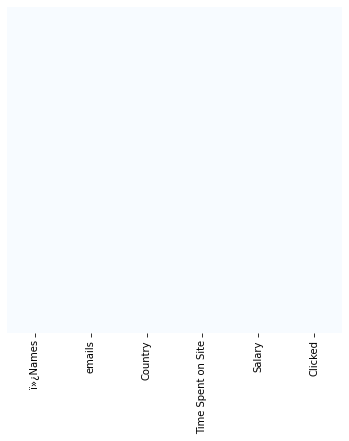

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

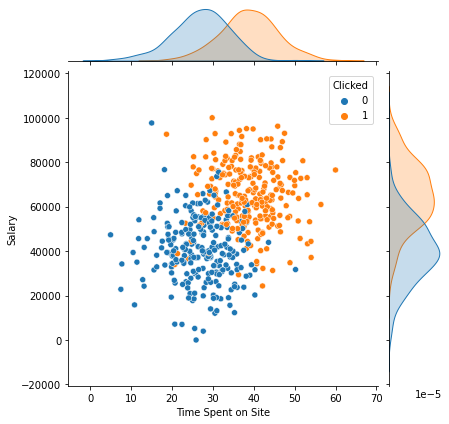

In [9]:
sns.jointplot(df['Time Spent on Site'], df['Salary'], hue = df['Clicked'])

<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

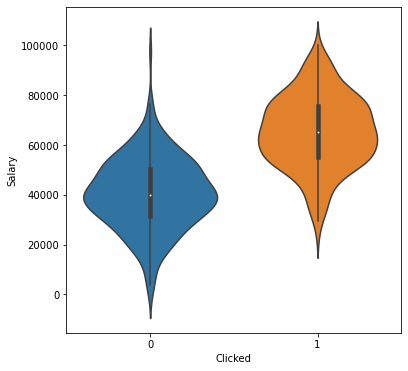

In [10]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='Clicked', y='Salary',data=df)

<AxesSubplot:xlabel='Clicked', ylabel='Time Spent on Site'>

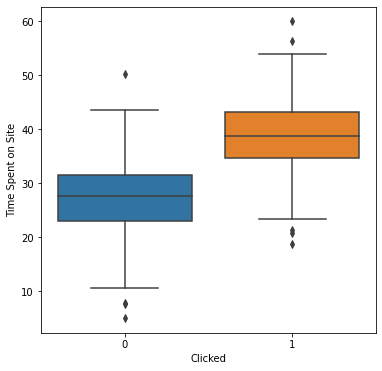

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Clicked', y='Time Spent on Site', data=df)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

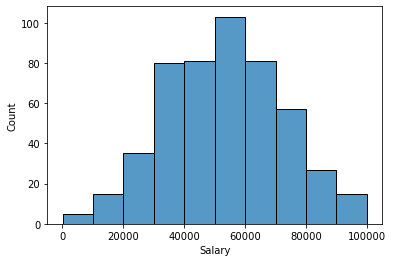

In [12]:
sns.histplot(data=df, x='Salary',bins=10)

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Count'>

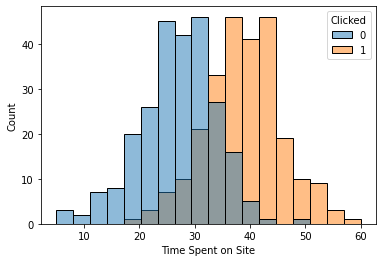

In [13]:
sns.histplot(data=df,x=df['Time Spent on Site'],hue='Clicked')

# STEP #3: Clean Data

In [14]:
df.drop(['ï»¿Names', 'emails', 'Country'],axis=1,inplace=True)

In [15]:
X = df.drop('Clicked',axis=1).values
y = df['Clicked'].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: TRAIN MODEL

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP#5: TEST MODEL

In [19]:
y_predict= classifier.predict(X_test)

<AxesSubplot:>

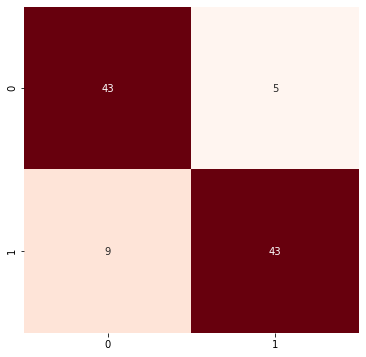

In [20]:
plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', cbar=False)

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# STEP #6: VISUALIZING TESTING DATASET

In [22]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


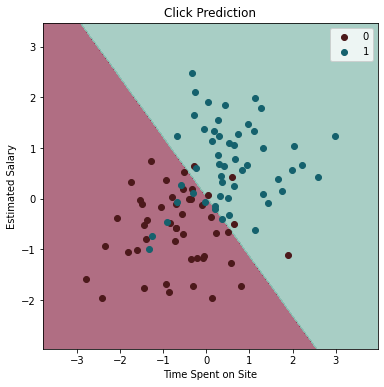

In [23]:
X_set, y_set = X_test, y_test
plt.figure(figsize=(6,6))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#963D5A', '#8BBEB2')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('#4C191B', '#15616D'))(i), label = j)
plt.title('Click Prediction')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()